## (Additional) Street Cleaning Schedule
There are more than 60% of the street corridors sweep streets every single week.

### Import Data
[Street Sweeping Schedule](https://data.sfgov.org/City-Infrastructure/Street-Sweeping-Schedule/yhqp-riqs) downloaded at DataSF

In [37]:
import pandas as pd
import requests

In [38]:
# Import street_sweeping_schedule.csv
schedule = pd.read_csv('street_sweeping_schedule.csv',
                              dtype={'BlockSweepID': object})

In [39]:
schedule.head()

,CNN,Corridor,Limits,CNNRightLeft,BlockSide,FullName,WeekDay,FromHour,ToHour,Week1,Week2,Week3,Week4,Week5,Holidays,BlockSweepID,Line
0,12043000,Sparta St,Ankeny St - Harkness Ave,R,West,Friday,Fri,12,15,1,1,1,1,1,0,1611118,"LINESTRING (-122.403554923986 37.718336652479,..."
1,13148101,Van Ness Ave,Golden Gate Ave - Turk St,L,West,Tuesday,Tues,2,6,1,1,1,1,1,0,1598891,"LINESTRING (-122.420439517797 37.781030842108,..."
2,12146000,Steiner St,Pacific Ave - Broadway,L,West,Wed 1st & 3rd,Wed,11,13,1,0,1,0,0,0,1611173,"LINESTRING (-122.436381034464 37.793136720893,..."
3,13377000,Waller St,Clayton St - Belvedere St,L,South,Monday,Mon,8,10,1,1,1,1,1,0,1628458,"LINESTRING (-122.448389686041 37.768864629361,..."
4,12886000,University St,Woolsey St - Dwight St,R,West,Wednesday,Wed,12,15,1,1,1,1,1,0,1598757,"LINESTRING (-122.412468269252 37.722658455651,..."


In [51]:
# Check duplicates
schedule['BlockSweepID'].nunique()

37878

In [52]:
len(schedule)

37878

### How's the schedule looks like?

#### Sweeping Frequency

In [40]:
# Create a new column that add up columns ['Week1':'Week5']
schedule['Frequency_per_month'] = schedule['Week1']+schedule['Week2']+schedule['Week3']+schedule['Week4']+schedule['Week5']
schedule.head()

,CNN,Corridor,Limits,CNNRightLeft,BlockSide,FullName,WeekDay,FromHour,ToHour,Week1,Week2,Week3,Week4,Week5,Holidays,BlockSweepID,Line,Frequency_per_month
0,12043000,Sparta St,Ankeny St - Harkness Ave,R,West,Friday,Fri,12,15,1,1,1,1,1,0,1611118,"LINESTRING (-122.403554923986 37.718336652479,...",5
1,13148101,Van Ness Ave,Golden Gate Ave - Turk St,L,West,Tuesday,Tues,2,6,1,1,1,1,1,0,1598891,"LINESTRING (-122.420439517797 37.781030842108,...",5
2,12146000,Steiner St,Pacific Ave - Broadway,L,West,Wed 1st & 3rd,Wed,11,13,1,0,1,0,0,0,1611173,"LINESTRING (-122.436381034464 37.793136720893,...",2
3,13377000,Waller St,Clayton St - Belvedere St,L,South,Monday,Mon,8,10,1,1,1,1,1,0,1628458,"LINESTRING (-122.448389686041 37.768864629361,...",5
4,12886000,University St,Woolsey St - Dwight St,R,West,Wednesday,Wed,12,15,1,1,1,1,1,0,1598757,"LINESTRING (-122.412468269252 37.722658455651,...",5


In [41]:
# There are 23762 corridors in SF sweep streets every week (the majority)
schedule['Frequency_per_month'].value_counts()

5    23762
2    11273
3     2741
1      102
Name: Frequency_per_month, dtype: int64

In [42]:
# There are over 60% of the corridors in SF sweep streets every week
schedule['Frequency_per_month'].value_counts(normalize=True)

5    0.627330
2    0.297613
3    0.072364
1    0.002693
Name: Frequency_per_month, dtype: float64

In [43]:
# List all the cleaning schedule circumstances
schedule['FullName'].value_counts()

Wednesday            4223
Thursday             4072
Tuesday              4063
Friday               4002
Monday               3967
Mon 2nd & 4th        1673
Tue 2nd & 4th        1434
Thu 2nd & 4th        1356
Saturday             1340
Fri 2nd & 4th        1272
Sunday               1271
Wed 2nd & 4th        1199
Mon 1st & 3rd         999
Wed 1st & 3rd         978
Fri 1st & 3rd         907
HOLIDAY               824
Tue 1st & 3rd         752
Thu 1st & 3rd         703
Thu 1st, 3rd, 5th     577
Tue 1st, 3rd, 5th     546
Fri 1st, 3rd, 5th     497
Mon 1st, 3rd, 5th     476
Wed 1st, 3rd, 5th     311
Tue 2nd, 4th, 5th      69
Thu 2nd, 4th, 5th      68
Wed 2nd, 4th, 5th      67
Mon 2nd, 4th, 5th      67
Fri 2nd, 4th, 5th      63
Wed 1st                31
Tue 1st                27
Fri 1st                22
Thu 1st                22
Name: FullName, dtype: int64

In [44]:
# Mission St has the most corridors cleaning every week
schedule[
    schedule['Frequency_per_month'] == 5
].value_counts(['Corridor'])

Corridor       
Mission St         1660
03rd St            1094
Market St           920
Van Ness Ave        482
The Embarcadero     351
                   ... 
Rondel Pl             1
Peter Yorke Way       1
Sumner St             1
Peralta Ave           1
Lois Ln               1
Length: 903, dtype: int64

#### Street cleanings on holidays

In [45]:
# There are 2733 corridors sweep streets  on holidays
schedule[
    (schedule['Holidays'] == 1) 
]

,CNN,Corridor,Limits,CNNRightLeft,BlockSide,FullName,WeekDay,FromHour,ToHour,Week1,Week2,Week3,Week4,Week5,Holidays,BlockSweepID,Line,Frequency_per_month
5,188201,03rd St,18th St - 19th St,R,West,Sunday,Sun,2,6,1,1,1,1,1,1,1613797,"LINESTRING (-122.388737998431 37.763048278835,...",5
7,9105000,Mission St,09th St - Washburn St,L,SouthEast,Tuesday,Tues,2,6,1,1,1,1,1,1,1618808,"LINESTRING (-122.414711003922 37.776230519995,...",5
10,9102000,Mission St,Julia St - 08th St,L,SouthEast,Thursday,Thu,2,6,1,1,1,1,1,1,1618894,"LINESTRING (-122.412413343787 37.778045328617,...",5
12,8757101,Market St,Franklin St - Brady St,L,SouthEast,Friday,Fri,2,6,1,1,1,1,1,1,1640920,"LINESTRING (-122.420698773999 37.774007805689,...",5
53,8764201,Market St,Church St - 15th St,R,NorthWest,Tuesday,Tues,2,6,1,1,1,1,1,1,1625895,"LINESTRING (-122.428948566763 37.767504459571,...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37824,7834201,King St,04th St - 05th St,R,NorthWest,Monday,Mon,0,2,1,1,1,1,1,1,1627903,"LINESTRING (-122.394035065718 37.776332976564,...",5
37826,13155101,Van Ness Ave,Sutter St - Fern St,L,West,Saturday,Sat,4,6,1,1,1,1,1,1,1640046,"LINESTRING (-122.42175810402 37.787548139832, ...",5
37828,7459000,Jefferson St,Leavenworth St - Hyde St,R,North,Saturday,Sat,1,3,1,1,1,1,1,1,1597420,"LINESTRING (-122.419086067987 37.807803117552,...",5
37839,11963101,Sloat Blvd,45th Ave - 47th Ave,R,North,Tuesday,Tues,5,7,1,1,1,1,1,1,1621615,"LINESTRING (-122.503104759293 37.735466491501,...",5


In [46]:
# All corridors that do street cleanings on holidays do street cleaning every week
schedule[
    (schedule['Frequency_per_month'] == 5) &
    (schedule['Holidays'] == 1)
]

,CNN,Corridor,Limits,CNNRightLeft,BlockSide,FullName,WeekDay,FromHour,ToHour,Week1,Week2,Week3,Week4,Week5,Holidays,BlockSweepID,Line,Frequency_per_month
5,188201,03rd St,18th St - 19th St,R,West,Sunday,Sun,2,6,1,1,1,1,1,1,1613797,"LINESTRING (-122.388737998431 37.763048278835,...",5
7,9105000,Mission St,09th St - Washburn St,L,SouthEast,Tuesday,Tues,2,6,1,1,1,1,1,1,1618808,"LINESTRING (-122.414711003922 37.776230519995,...",5
10,9102000,Mission St,Julia St - 08th St,L,SouthEast,Thursday,Thu,2,6,1,1,1,1,1,1,1618894,"LINESTRING (-122.412413343787 37.778045328617,...",5
12,8757101,Market St,Franklin St - Brady St,L,SouthEast,Friday,Fri,2,6,1,1,1,1,1,1,1640920,"LINESTRING (-122.420698773999 37.774007805689,...",5
53,8764201,Market St,Church St - 15th St,R,NorthWest,Tuesday,Tues,2,6,1,1,1,1,1,1,1625895,"LINESTRING (-122.428948566763 37.767504459571,...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37824,7834201,King St,04th St - 05th St,R,NorthWest,Monday,Mon,0,2,1,1,1,1,1,1,1627903,"LINESTRING (-122.394035065718 37.776332976564,...",5
37826,13155101,Van Ness Ave,Sutter St - Fern St,L,West,Saturday,Sat,4,6,1,1,1,1,1,1,1640046,"LINESTRING (-122.42175810402 37.787548139832, ...",5
37828,7459000,Jefferson St,Leavenworth St - Hyde St,R,North,Saturday,Sat,1,3,1,1,1,1,1,1,1597420,"LINESTRING (-122.419086067987 37.807803117552,...",5
37839,11963101,Sloat Blvd,45th Ave - 47th Ave,R,North,Tuesday,Tues,5,7,1,1,1,1,1,1,1621615,"LINESTRING (-122.503104759293 37.735466491501,...",5


In [47]:
# Mission St has the most corridors cleaning every week and on holidays
schedule[
    (schedule['Frequency_per_month'] == 5) &
    (schedule['Holidays'] == 1)
].value_counts(['Corridor'])

Corridor                     
Mission St                       679
Market St                        408
The Embarcadero                  351
03rd St                          260
16th St                          218
                                ... 
Austin St                          2
Geary Blvd To Point Lobos Ave      2
Florida St                         2
Waverly Pl                         2
15th St                            2
Length: 63, dtype: int64

### How does 'Mission Street' street sweeping looks like?
Mission St has the most corridors that sweep the streets every week

In [61]:
# There are 2024 corridors on Mission St and out of it, 1660 sweep streets every week
mission_st = schedule[schedule['Corridor'] == 'Mission St'].sort_values('Limits').reset_index()
mission_st

,index,CNN,Corridor,Limits,CNNRightLeft,BlockSide,FullName,WeekDay,FromHour,ToHour,Week1,Week2,Week3,Week4,Week5,Holidays,BlockSweepID,Line,Frequency_per_month
0,3096,9088000,Mission St,01st St - Ecker St,R,NorthWest,Sunday,Sun,2,6,1,1,1,1,1,1,1618496,"LINESTRING (-122.397574468067 37.789762598234,...",5
1,11231,9088000,Mission St,01st St - Ecker St,R,NorthWest,Friday,Fri,2,6,1,1,1,1,1,1,1618434,"LINESTRING (-122.397574468067 37.789762598234,...",5
2,12360,9088000,Mission St,01st St - Ecker St,R,NorthWest,Tuesday,Tues,2,6,1,1,1,1,1,1,1618372,"LINESTRING (-122.397574468067 37.789762598234,...",5
3,20446,9088000,Mission St,01st St - Ecker St,L,SouthEast,Sunday,Sun,2,6,1,1,1,1,1,1,1618946,"LINESTRING (-122.397574468067 37.789762598234,...",5
4,15454,9088000,Mission St,01st St - Ecker St,R,NorthWest,Wednesday,Wed,2,6,1,1,1,1,1,1,1618527,"LINESTRING (-122.397574468067 37.789762598234,...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,3263,9095202,Mission St,Yerba Buena Ln - 04th St,R,NaN,Friday,Fri,2,6,1,1,1,1,1,1,1618442,"LINESTRING (-122.403501281584 37.78512185399, ...",5
2020,9976,9095202,Mission St,Yerba Buena Ln - 04th St,R,NaN,Saturday,Sat,2,6,1,1,1,1,1,1,1618473,"LINESTRING (-122.403501281584 37.78512185399, ...",5
2021,21322,9095202,Mission St,Yerba Buena Ln - 04th St,R,NaN,Sunday,Sun,2,6,1,1,1,1,1,1,1618504,"LINESTRING (-122.403501281584 37.78512185399, ...",5
2022,1850,9095202,Mission St,Yerba Buena Ln - 04th St,R,NaN,Wednesday,Wed,2,6,1,1,1,1,1,1,1618535,"LINESTRING (-122.403501281584 37.78512185399, ...",5


In [62]:
mission_st['CNN'].nunique()

138

In [63]:
mission_st['CNN'].value_counts()

9136000    26
9138000    26
9145000    26
9137000    26
9134000    26
           ..
9113000     5
9149101     5
9147101     5
9112201     3
9112101     2
Name: CNN, Length: 138, dtype: int64

In [64]:
mission_st[mission_st['Frequency_per_month']==5]

,index,CNN,Corridor,Limits,CNNRightLeft,BlockSide,FullName,WeekDay,FromHour,ToHour,Week1,Week2,Week3,Week4,Week5,Holidays,BlockSweepID,Line,Frequency_per_month
0,3096,9088000,Mission St,01st St - Ecker St,R,NorthWest,Sunday,Sun,2,6,1,1,1,1,1,1,1618496,"LINESTRING (-122.397574468067 37.789762598234,...",5
1,11231,9088000,Mission St,01st St - Ecker St,R,NorthWest,Friday,Fri,2,6,1,1,1,1,1,1,1618434,"LINESTRING (-122.397574468067 37.789762598234,...",5
2,12360,9088000,Mission St,01st St - Ecker St,R,NorthWest,Tuesday,Tues,2,6,1,1,1,1,1,1,1618372,"LINESTRING (-122.397574468067 37.789762598234,...",5
3,20446,9088000,Mission St,01st St - Ecker St,L,SouthEast,Sunday,Sun,2,6,1,1,1,1,1,1,1618946,"LINESTRING (-122.397574468067 37.789762598234,...",5
4,15454,9088000,Mission St,01st St - Ecker St,R,NorthWest,Wednesday,Wed,2,6,1,1,1,1,1,1,1618527,"LINESTRING (-122.397574468067 37.789762598234,...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,3263,9095202,Mission St,Yerba Buena Ln - 04th St,R,NaN,Friday,Fri,2,6,1,1,1,1,1,1,1618442,"LINESTRING (-122.403501281584 37.78512185399, ...",5
2020,9976,9095202,Mission St,Yerba Buena Ln - 04th St,R,NaN,Saturday,Sat,2,6,1,1,1,1,1,1,1618473,"LINESTRING (-122.403501281584 37.78512185399, ...",5
2021,21322,9095202,Mission St,Yerba Buena Ln - 04th St,R,NaN,Sunday,Sun,2,6,1,1,1,1,1,1,1618504,"LINESTRING (-122.403501281584 37.78512185399, ...",5
2022,1850,9095202,Mission St,Yerba Buena Ln - 04th St,R,NaN,Wednesday,Wed,2,6,1,1,1,1,1,1,1618535,"LINESTRING (-122.403501281584 37.78512185399, ...",5


### How does '3rd Street' street sweeping looks like?

In [69]:
third_st = schedule[schedule['Corridor'] == '03rd St'].sort_values('Limits').reset_index()
third_st

,index,CNN,Corridor,Limits,CNNRightLeft,BlockSide,FullName,WeekDay,FromHour,ToHour,Week1,Week2,Week3,Week4,Week5,Holidays,BlockSweepID,Line,Frequency_per_month
0,13739,186201,03rd St,16th St - Mariposa St,R,West,Sunday,Sun,2,6,1,1,1,1,1,1,1613795,"LINESTRING (-122.389099104328 37.76690347969, ...",5
1,26551,186201,03rd St,16th St - Mariposa St,R,West,Saturday,Sat,2,6,1,1,1,1,1,0,1613855,"LINESTRING (-122.389099104328 37.76690347969, ...",5
2,23752,186101,03rd St,16th St - Mariposa St,L,East,Thursday,Thu,2,6,1,1,1,1,1,0,1636334,"LINESTRING (-122.389099104328 37.76690347969, ...",5
3,21966,186201,03rd St,16th St - Mariposa St,R,West,Wednesday,Wed,2,6,1,1,1,1,1,0,1613948,"LINESTRING (-122.389099104328 37.76690347969, ...",5
4,32610,186101,03rd St,16th St - Mariposa St,L,East,Tuesday,Tues,2,6,1,1,1,1,1,0,1636315,"LINESTRING (-122.389099104328 37.76690347969, ...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4042,184001,03rd St,rry A Francois Blvd - Channel,L,NaN,Saturday,Sat,2,6,1,1,1,1,1,0,1628952,"LINESTRING (-122.390025039703 37.776300145376,...",5
1090,13404,184001,03rd St,rry A Francois Blvd - Channel,L,NaN,Wednesday,Wed,2,6,1,1,1,1,1,0,1628930,"LINESTRING (-122.390025039703 37.776300145376,...",5
1091,15261,184001,03rd St,rry A Francois Blvd - Channel,R,NaN,Saturday,Sat,2,6,1,1,1,1,1,0,1613846,"LINESTRING (-122.390025039703 37.776300145376,...",5
1092,36329,184001,03rd St,rry A Francois Blvd - Channel,L,NaN,Sunday,Sun,2,6,1,1,1,1,1,1,1628940,"LINESTRING (-122.390025039703 37.776300145376,...",5


In [66]:
third_st['CNN'].value_counts()

168000    16
179000    16
163000    16
177000    16
196000    16
          ..
188101     2
233202     2
232201     1
233101     1
232101     1
Name: CNN, Length: 136, dtype: int64

### How does 'Market Street' street sweeping looks like?

In [70]:
market_st = schedule[schedule['Corridor'] == 'Market St'].sort_values('Limits').reset_index()
market_st

,index,CNN,Corridor,Limits,CNNRightLeft,BlockSide,FullName,WeekDay,FromHour,ToHour,Week1,Week2,Week3,Week4,Week5,Holidays,BlockSweepID,Line,Frequency_per_month
0,27261,8743201,Market St,02nd St - Montgomery St,R,NorthWest,HOLIDAY,Holiday,5,7,1,1,1,1,1,1,1640520,"LINESTRING (-122.401375491232 37.789264322323,...",5
1,26994,8743101,Market St,02nd St - Montgomery St,L,SouthEast,Saturday,Sat,5,7,1,1,1,1,1,1,1640605,"LINESTRING (-122.401375491232 37.789264322323,...",5
2,11089,8743201,Market St,02nd St - Montgomery St,L,SouthEast,Friday,Fri,2,6,1,1,1,1,1,0,1642700,"LINESTRING (-122.401375491232 37.789264322323,...",5
3,19789,8743201,Market St,02nd St - Montgomery St,R,NorthWest,Monday,Mon,5,6,1,1,1,1,1,0,1640420,"LINESTRING (-122.401375491232 37.789264322323,...",5
4,2823,8743101,Market St,02nd St - Montgomery St,L,SouthEast,Sunday,Sun,5,7,1,1,1,1,1,1,1640595,"LINESTRING (-122.401375491232 37.789264322323,...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,32240,8746103,Market St,Yerba Buena Ln - Stockton St,R,NaN,Friday,Fri,2,6,1,1,1,1,1,0,1642683,"LINESTRING (-122.405013219483 37.786328681529,...",5
916,31421,8746103,Market St,Yerba Buena Ln - Stockton St,L,NaN,Friday,Fri,5,6,1,1,1,1,1,0,1640705,"LINESTRING (-122.405013219483 37.786328681529,...",5
917,21171,8746103,Market St,Yerba Buena Ln - Stockton St,L,NaN,Tuesday,Tues,5,6,1,1,1,1,1,0,1640774,"LINESTRING (-122.405013219483 37.786328681529,...",5
918,13221,8746103,Market St,Yerba Buena Ln - Stockton St,L,NaN,Wednesday,Wed,5,6,1,1,1,1,1,0,1640797,"LINESTRING (-122.405013219483 37.786328681529,...",5


In [68]:
market_st['CNN'].value_counts()

8743201    13
8750202    13
8744202    13
8743101    13
8746201    13
           ..
8773202     1
8768201     1
8776104     1
8776204     1
8776102     1
Name: CNN, Length: 116, dtype: int64

### Visualize on Map

In [71]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import geopandas as gpd
import altair as alt
import requests

In [72]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [73]:
url = 'https://data.sfgov.org/api/geospatial/p5b7-5n3h?method=export&format=Shapefile'
r = requests.get(url, allow_redirects=False)

# write the content of the request into a file called `sf_shapefiles.zip`
open('sf_shapefiles.zip', 'wb').write(r.content)

454237

<AxesSubplot:>

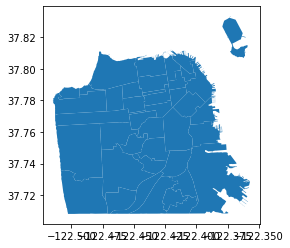

In [74]:
sf_shapefiles = gpd.read_file('sf_shapefiles.zip')
sf_shapefiles.to_crs(epsg=4326).plot() ## projection

In [75]:
schedule_every_week = schedule[schedule['Frequency_per_month'] == 5]

In [82]:
from shapely.geometry import Polygon, LineString, Point

In [103]:
schedule_every_week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23762 entries, 0 to 37877
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CNN                  23762 non-null  int64 
 1   Corridor             23762 non-null  object
 2   Limits               23762 non-null  object
 3   CNNRightLeft         23762 non-null  object
 4   BlockSide            22999 non-null  object
 5   FullName             23762 non-null  object
 6   WeekDay              23762 non-null  object
 7   FromHour             23762 non-null  int64 
 8   ToHour               23762 non-null  int64 
 9   Week1                23762 non-null  int64 
 10  Week2                23762 non-null  int64 
 11  Week3                23762 non-null  int64 
 12  Week4                23762 non-null  int64 
 13  Week5                23762 non-null  int64 
 14  Holidays             23762 non-null  int64 
 15  BlockSweepID         23762 non-null  object
 16  Line

In [104]:
schedule_every_week = gpd.GeoDataFrame(schedule_every_week)

In [111]:
conda list

# packages in environment at /Users/jiyuntsai/opt/anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39hecd8cb5_1  
aiohttp                   3.8.1            py39hca72f7f_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
altair                    4.2.0                    pypi_0    pypi
anaconda                  2022.05                  py39_0  
anaconda-client           1.9.0            py39hecd8cb5_0  
anaconda-navigator        2.3.2            py39hecd8cb5_0  
anaconda-project          0.10.2             pyhd3eb1b0_0  
anyio                     3.5.0            py39hecd8cb5_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
applaunchservices         0.2.1              pyhd3eb1b0_0  
appnope                   0.1.2           py39hecd8cb5_1001  
appscript                 1.1.2            py39h9ed2024_0  
argon2-cffi           

In [112]:
pip freeze

aiohttp @ file:///opt/concourse/worker/volumes/live/ba252660-e2b9-4a6d-6906-9be4ed7deda4/volume/aiohttp_1646806382603/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altair==4.2.0
anaconda-client @ file:///opt/concourse/worker/volumes/live/866d4dd0-ff5b-4d0b-718d-0267a3b10e06/volume/anaconda-client_1635342573767/work
anaconda-navigator==2.3.2
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1637161053845/work
anyio @ file:///opt/concourse/worker/volumes/live/485b0f52-1188-482a-6285-65a36c8fa8a6/volume/anyio_1644481714856/work/dist
appdirs==1.4.4
applaunchservices @ file:///Users/ktietz/demo/mc3/conda-bld/applaunchservices_1630511705208/work
appnope @ file:///opt/concourse/worker/volumes/live/6ca6f098-d773-4461-5c91-a24a17435bda/volume/appnope_1606859448531/work
appscript @ file:///opt/concourse/worker/volumes/live/00049ed6-6263-4a6e-72b9-9d990f6e2f07/volume/appscript_1611427000595

In [ ]:
conda list --export > requirements.txt